<h1>Home Assignment #3</h1>

## Task 1. PCA drawbacks (3 points)

You have a classification task, and your goal is to employ Principal Component Analysis (PCA) for dimensionality reduction. The objective is to eliminate noise from the data while retaining crucial information. However, after applying PCA, you notice a significant decrease in classification accuracy.

**Part 1**: **Describe** three possible scenarios (*0.5 pts each*) where the initial components of PCA remove essential information instead of noise.

**Part 2**: **Recreate** the scenarios (*0.5 pts each*) by displaying the data before and after PCA to support your assumptions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Function to train and evaluate logistic regression model
def evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

**Scenario #1**

Insufficient Number of Retained Components:

Description: If you retain too few principal components during PCA, you may not capture enough variance in the data. As a result, crucial information needed for classification might be discarded, leading to a decrease in accuracy.

Scenario 1 Accuracy - Before PCA: 0.9500, After PCA: 0.8500


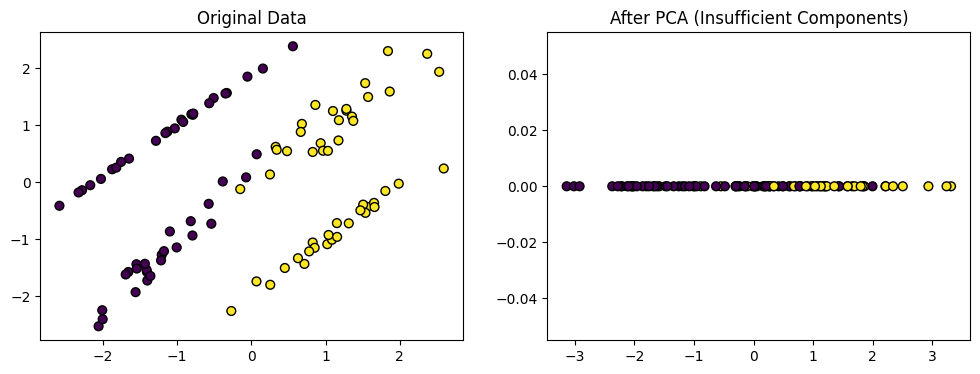

In [ ]:
# Scenario 1: Insufficient Number of Retained Components
np.random.seed(42)
X_insufficient, y_insufficient = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Apply PCA with insufficient components
pca_insufficient = PCA(n_components=1)
X_pca_insufficient = pca_insufficient.fit_transform(X_insufficient)

# Scenario 1: Insufficient Number of Retained Components
X_train_insufficient, X_test_insufficient, y_train_insufficient, y_test_insufficient = train_test_split(X_insufficient, y_insufficient, test_size=0.2, random_state=42)

# Before PCA
accuracy_before_pca_insufficient = evaluate_logistic_regression(X_train_insufficient, X_test_insufficient, y_train_insufficient, y_test_insufficient)

# After PCA
X_train_pca_insufficient, X_test_pca_insufficient = pca_insufficient.transform(X_train_insufficient), pca_insufficient.transform(X_test_insufficient)
accuracy_after_pca_insufficient = evaluate_logistic_regression(X_train_pca_insufficient, X_test_pca_insufficient, y_train_insufficient, y_test_insufficient)

print(f'Scenario 1 Accuracy - Before PCA: {accuracy_before_pca_insufficient:.4f}, After PCA: {accuracy_after_pca_insufficient:.4f}')

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_insufficient[:, 0], X_insufficient[:, 1], c=y_insufficient, cmap='viridis', edgecolor='k', s=40, label='Original Data')
plt.title('Original Data')
plt.subplot(122)
plt.scatter(X_pca_insufficient, np.zeros_like(X_pca_insufficient), c=y_insufficient, cmap='viridis', edgecolor='k', s=40, label='After PCA')
plt.title('After PCA (Insufficient Components)')
plt.show()

**Scenario #2**

Non-Linear Relationships in Data:

Description: PCA assumes linear relationships between variables. If the underlying data has significant non-linear relationships, PCA might not effectively capture these structures, leading to loss of essential information.

Scenario 2 Accuracy - Before PCA: 0.6500, After PCA: 0.3500


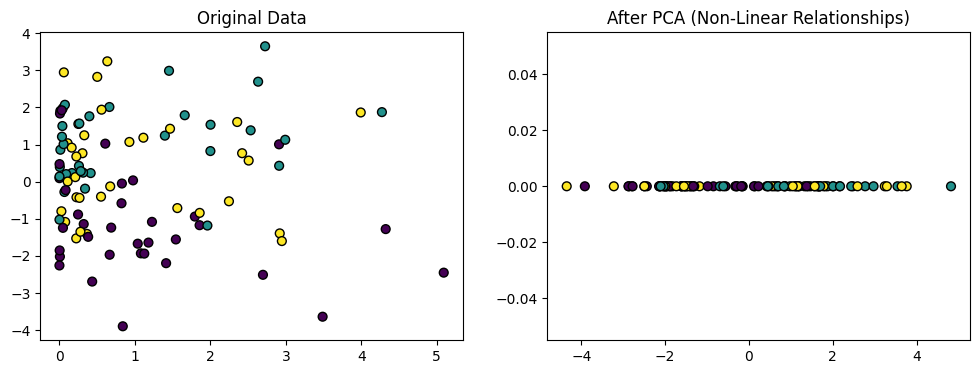

In [ ]:
# Scenario 2: Non-Linear Relationships
np.random.seed(42)
X_nonlinear, y_nonlinear = make_classification(n_samples=100, n_features=6, n_informative=4, n_redundant=0, n_clusters_per_class=3, n_classes=3, random_state=42)
X_nonlinear[:,0] = X_nonlinear[:,0]**2

# Apply PCA
pca_nonlinear = PCA(n_components=1)
X_pca_nonlinear = pca_nonlinear.fit_transform(X_nonlinear)

X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

# Before PCA
accuracy_before_pca_nonlinear = evaluate_logistic_regression(X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear)

# After PCA
X_train_pca_nonlinear, X_test_pca_nonlinear = pca_nonlinear.transform(X_train_nonlinear), pca_nonlinear.transform(X_test_nonlinear)
accuracy_after_pca_nonlinear = evaluate_logistic_regression(X_train_pca_nonlinear, X_test_pca_nonlinear, y_train_nonlinear, y_test_nonlinear)

print(f'Scenario 2 Accuracy - Before PCA: {accuracy_before_pca_nonlinear:.4f}, After PCA: {accuracy_after_pca_nonlinear:.4f}')

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='viridis', edgecolor='k', s=40, label='Original Data')
plt.title('Original Data')
plt.subplot(122)
plt.scatter(X_pca_nonlinear, np.zeros_like(X_pca_nonlinear), c=y_nonlinear, cmap='viridis', edgecolor='k', s=40, label='After PCA')
plt.title('After PCA (Non-Linear Relationships)')
plt.show()


**Scenario #3**

Noise Misinterpreted as Signal:

Description: If there's substantial noise in the data that is not appropriately handled before PCA, the algorithm might interpret noisy variations as meaningful signal. Consequently, it retains components that represent noise rather than relevant information.

Scenario 3 Accuracy - Before PCA: 0.9500, After PCA: 0.5000


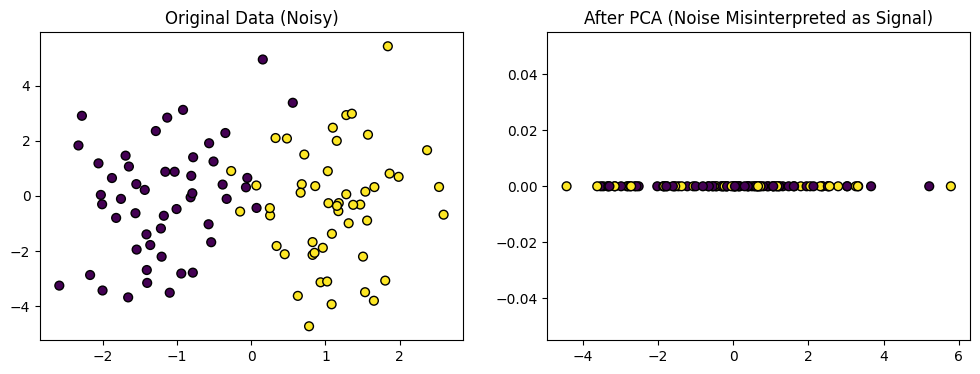

In [ ]:
# Scenario 3: Noise Misinterpreted as Signal
np.random.seed(42)
X_noisy, y_noisy = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Add significant noise
X_noisy[:, 1] = X_noisy[:, 1] + np.random.normal(0, 2, 100)

# Apply PCA
pca_noise_misinterpreted = PCA(n_components=1)
X_pca_noise_misinterpreted = pca_noise_misinterpreted.fit_transform(X_noisy)

X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)

# Before PCA
accuracy_before_pca_noisy = evaluate_logistic_regression(X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy)

# After PCA
X_train_pca_noisy, X_test_pca_noisy = pca_noise_misinterpreted.transform(X_train_noisy), pca_noise_misinterpreted.transform(X_test_noisy)
accuracy_after_pca_noisy = evaluate_logistic_regression(X_train_pca_noisy, X_test_pca_noisy, y_train_noisy, y_test_noisy)

print(f'Scenario 3 Accuracy - Before PCA: {accuracy_before_pca_noisy:.4f}, After PCA: {accuracy_after_pca_noisy:.4f}')

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, cmap='viridis', edgecolor='k', s=40, label='Original Data')
plt.title('Original Data (Noisy)')
plt.subplot(122)
plt.scatter(X_pca_noise_misinterpreted, np.zeros_like(X_pca_noise_misinterpreted), c=y_noisy, cmap='viridis', edgecolor='k', s=40, label='After PCA')
plt.title('After PCA (Noise Misinterpreted as Signal)')
plt.show()

## Task 2. KNN separation (3 points)

Imagine a simple scenario where you have two points belonging to different classes, labeled as $a$ and $b$, situated in a 2D plane with coordinates $(x_a, y_a)$ and $(x_b, y_b)$. You are applying the Nearest Neighbor rule for classification.

**Part 1**: Determine the classification rule shape based on $L_2$ distances. (*1 pt*)

**Part 2**: Determine the classification rule shape based on $L_1$ distances. (*2 pts*)

***Note***: The term "*classification rule shape*" refers to a ***shape that can be analytically described***, such as a line with a specific formula, a union of segments, a circle, or any other geometric shape ***based on the coordinates of the original points***.

**Part 1: Classification Rule Shape based on $(L_2$) Distances**

In the context of Nearest Neighbor classification with $(L_2$) distances (Euclidean distances), the decision boundary is based on points equidistant between neighboring classes. In a 2D plane, this decision boundary is a **straight line** that bisects the line segment connecting the two nearest points from different classes. The equation of this line can be found by finding the midpoint of the line segment connecting the two points $((x_a, y_a)$) and $((x_b, y_b)$).

Let's denote the midpoint as $((x_{\text{mid}}, y_{\text{mid}})$), then the equation of the line is given by:

$ (x - x_{\text{mid}})^2 + (y - y_{\text{mid}})^2 = r^2 $

where $( r $) is the distance from $((x_{\text{mid}}, y_{\text{mid}})$) to either $((x_a, y_a)$) or $((x_b, y_b)$). The midpoint coordinates are calculated as:

$ x_{\text{mid}} = \frac{x_a + x_b}{2} $

$ y_{\text{mid}} = \frac{y_a + y_b}{2} $

And the radius $( r $) is given by the Euclidean distance formula:

$ r = \sqrt{(x_a - x_{\text{mid}})^2 + (y_a - y_{\text{mid}})^2} $

So, the classification rule shape is a circle with center $((x_{\text{mid}}, y_{\text{mid}})$) and radius $( r $).

**Part 2: Classification Rule Shape based on $(L_1$) Distances**

In the case of $(L_1$) distances (Manhattan distances), the decision boundary is based on points equidistant between neighboring classes, but the distance is measured differently. The classification rule shape is a **straight line** perpendicular to the line segment connecting the two nearest points.

Let $((x_1, y_1)$) and $((x_2, y_2)$) be the coordinates of the two nearest points from different classes. The equation of the line is given by:

$ |x - x_{\text{mid}}| + |y - y_{\text{mid}}| = r $

where $((x_{\text{mid}}, y_{\text{mid}})$) is the midpoint of the line segment connecting $((x_1, y_1)$) and $((x_2, y_2)$), and $( r $) is the Manhattan distance from $((x_{\text{mid}}, y_{\text{mid}})$) to either $((x_1, y_1)$) or $((x_2, y_2)$). The midpoint coordinates and the Manhattan distance are given by:

$ x_{\text{mid}} = \frac{x_1 + x_2}{2} $

$ y_{\text{mid}} = \frac{y_1 + y_2}{2} $

$ r = |x_1 - x_{\text{mid}}| + |y_1 - y_{\text{mid}}| $

This classification rule shape is a diamond shape with its diagonals representing the decision boundary.

In both cases, the shape of the decision boundary is directly related to the geometry of the nearest neighbors, demonstrating the intuitive nature of the Nearest Neighbor rule in these scenarios.

## Task 3. PCA, LDA, QDA (4 points)

Present an example scenario where both *(PCA followed by LDA)* and *(LDA alone)* result in **accuracy on the validation set being less than 100%**,  
while *(QDA alone)* **achieves 100% accuracy**. At the same time:

**Part 1**:  *(PCA followed by QDA)* yields **accuracy on the validation set less than 100%**. *(1 pt)*  
**Part 2**: *(PCA followed by QDA)* achieves **validation accuracy equal to 100%**. *(3 pts)*


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

**Part 1 solution**

In [ ]:
# Generate a dataset with overlapping features
X, y = make_classification(n_samples=1000, n_features=35, n_informative=35, n_redundant=0, n_classes=2, random_state=43)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LDA, PCA, QDA
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Apply PCA followed by LDA
pca_lda = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=10)), ('lda', lda)])

# Apply PCA followed by QDA
pca_qda = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=10)), ('qda', qda)])

print("Part 1:")
print(f"1. LDA accuracy on validation data: {accuracy_score(y_valid, lda.fit(X_train, y_train).predict(X_valid)) * 100:.2f}%")
print(f"2. LDA+PCA accuracy on validation data: {accuracy_score(y_valid, pca_lda.fit(X_train, y_train).predict(X_valid)) * 100:.2f}%")
print(f"3. QDA+PCA accuracy on validation data: {accuracy_score(y_valid, pca_qda.fit(X_train, y_train).predict(X_valid)) * 100:.2f}%")
print(f"4. QDA accuracy on validation data: {accuracy_score(y_valid, qda.fit(X_train, y_train).predict(X_valid)) * 100:.2f}%")

Part 1:
1. LDA accuracy on validation data: 85.00%
2. LDA+PCA accuracy on validation data: 71.00%
3. QDA+PCA accuracy on validation data: 73.00%
4. QDA accuracy on validation data: 100.00%


**Part 2 solution**

In [ ]:
# Generate a dataset with overlapping features
X, y = make_classification(n_samples=1000, n_features=43, n_informative=43, n_redundant=0, n_classes=2, random_state=42)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LDA, PCA, QDA
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Apply PCA followed by LDA
pca_lda = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=41)), ('lda', lda)])

# Apply PCA followed by QDA
pca_qda = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=41)), ('qda', qda)])

# Apply QDA alone
qda.fit(X_train, y_train)

# Print accuracies for Part 2
print("\nPart 2:")
print(f"1. LDA accuracy on validation data: {accuracy_score(y_valid, lda.fit(X_train, y_train).predict(X_valid)) * 100:.2f}%")
print(f"2. LDA+PCA accuracy on validation data: {accuracy_score(y_valid, pca_lda.fit(X_train, y_train).predict(X_valid)) * 100:.2f}%")
print(f"3. QDA+PCA accuracy on validation data: {accuracy_score(y_valid, pca_qda.fit(X_train, y_train).predict(X_valid)) * 100:.2f}%")
print(f"4. QDA accuracy on validation data: {accuracy_score(y_valid, qda.fit(X_train, y_train).predict(X_valid)) * 100:.2f}%")


Part 2:
1. LDA accuracy on validation data: 87.50%
2. LDA+PCA accuracy on validation data: 87.00%
3. QDA+PCA accuracy on validation data: 100.00%
4. QDA accuracy on validation data: 100.00%
